In [1]:
import matplotlib.pyplot as plt # type: ignore
class RegularizedRegression:
    def __init__(self, regularization='none', lambda_l1=0.01, lambda_l2=0.01, alpha=0.001, num_iterations=1000):
        self.regularization = regularization
        self.lambda_l1 = lambda_l1
        self.lambda_l2 = lambda_l2
        self.alpha = alpha
        self.num_iterations = num_iterations
        self.parameters = None

    def linear_loss(self, parameters, features, labels):
        N = len(labels)
        predictions = np.dot(features, parameters)
        loss = np.sum((predictions - labels) ** 2) / (2 * N)
        return loss

    def linear_gradient(self, parameters, features, labels):
        N = len(labels)
        predictions = np.dot(features, parameters)
        grad = (1 / N) * np.dot(features.T, (predictions - labels))
        return grad

    def fit(self, X, y):
    
        initial_parameters = np.zeros(X.shape[1])
        
       
        if self.regularization == 'l1':
            loss_function = self.lasso_loss
            gradient_function = self.lasso_gradient
        elif self.regularization == 'l2':
            loss_function = self.ridge_loss
            gradient_function = self.ridge_gradient
        elif self.regularization == 'elastic_net':
            loss_function = self.elastic_net_loss
            gradient_function = self.elastic_net_gradient
        else:
            loss_function = self.linear_loss
            gradient_function = self.linear_gradient
        
        self.parameters = initial_parameters.copy()
        iteration_list, loss_list = [], []
        
        for i in range(self.num_iterations):
            grad = gradient_function(self.parameters, X, y)
            self.parameters -= self.alpha * grad
            loss = loss_function(self.parameters, X, y)
            iteration_list.append(i)
            loss_list.append(loss)
            
        plt.plot(iteration_list, loss_list, 'ob', linestyle='solid', color='green')
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.title(f"Loss Function ({self.regularization.capitalize()})")
        plt.show()

    def predict(self, X):
        return np.dot(X, self.parameters)    


In [2]:
class ElasticNetModel(RegularizedRegression):
    def __init__(self, lambda_l1=0.01, lambda_l2=0.01, alpha=0.001, num_iterations=1000):
        super().__init__(regularization='elastic_net', lambda_l1=lambda_l1, lambda_l2=lambda_l2, alpha=alpha, num_iterations=num_iterations)
        self.parameters = None 

    def elastic_net_loss(self, parameters, features, labels):
        mse_loss = self.linear_loss(parameters, features, labels)
        l1_loss = self.lambda_l1 * np.sum(np.abs(parameters))
        l2_loss = self.lambda_l2 * np.linalg.norm(parameters) ** 2
        return mse_loss + l1_loss + l2_loss

    def elastic_net_gradient(self, parameters, features, labels):
        grad = self.linear_gradient(parameters, features, labels)
        l1_grad = self.lambda_l1 * np.sign(parameters)
        l2_grad = 2 * self.lambda_l2 * parameters
        return grad + l1_grad + l2_grad

    

    def predict(self, X):
        return np.dot(X, self.parameters)

In [3]:
class LassoModel(RegularizedRegression):
    def __init__(self, lambda_l1=0.01, alpha=0.001, num_iterations=1000):
        super().__init__(regularization='l1', lambda_l1=lambda_l1, alpha=alpha, num_iterations=num_iterations)

    def lasso_loss(self, parameters, features, labels):
        return self.linear_loss(parameters, features, labels) + self.lambda_l1 * np.sum(np.abs(parameters))

    def lasso_gradient(self, parameters, features, labels):
        grad = self.linear_gradient(parameters, features, labels)
        grad += self.lambda_l1 * np.sign(parameters)
        return grad
    def predict(self, X):
        return np.dot(X, self.parameters)

In [4]:


class KNNModel:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.loss_list = [] 
        self.iteration_list = [] 

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1)) 
            k_indices = distances.argsort()[:self.k] 
            k_nearest_labels = self.y_train[k_indices]
            prediction = np.mean(k_nearest_labels)
            predictions.append(prediction)

            loss = np.mean((prediction - self.y_train[k_indices]) ** 2)  
            self.loss_list.append(loss)
            self.iteration_list.append(len(self.loss_list)) 

        self.plot_loss() 

        return np.array(predictions)

    def plot_loss(self):
        plt.plot(self.iteration_list, self.loss_list, 'ob', linestyle='solid', color='green')
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.title(f"Loss Function (KNN)")
        plt.show()


In [5]:
class RidgeModel(RegularizedRegression):
    def __init__(self, lambda_l2=0.01, alpha=0.001, num_iterations=1000):
        super().__init__(regularization='l2', lambda_l2=lambda_l2, alpha=alpha, num_iterations=num_iterations)

    def ridge_loss(self, parameters, features, labels):
        return self.linear_loss(parameters, features, labels) + self.lambda_l2 * np.linalg.norm(parameters) ** 2

    def ridge_gradient(self, parameters, features, labels):
        grad = self.linear_gradient(parameters, features, labels)
        grad += 2 * self.lambda_l2 * parameters
        return grad
    def predict(self, X):
        return np.dot(X, self.parameters)

In [6]:
import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore
import numpy as np # type: ignore

def ScatterPlot(y_true, y_pred, model_name, r2):
    plt.scatter(y_true, y_pred, color='blue', edgecolor='k', alpha=0.6, s=50)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', lw=2, ls='dotted')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'True vs Predicted Values ({model_name})\nR² = {r2:.4f}')
    plt.grid(True)
    plt.show()

def run_models():
    results = []
    
    for i in range(3):
        if i == 1:
            print("\n ")
            print("----------------------------WHITE WINE----------------------------")
            print("\n ")
            data = pd.read_csv('winequality-white.csv', sep=';')
            X = data.drop(columns='quality').values  
            y = data['quality'].values
            dataset_name = "White Wine"
        elif i == 0:
            print("\n ")
            print("----------------------------DIABETES----------------------------")
            print("\n ")
            data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', header=None)
            X = data.iloc[:, :-1].values
            y = data.iloc[:, -1].values
            dataset_name = "Diabetes"
        elif i == 2:
            print("\n ")
            print("----------------------------GENERATED DATA----------------------------")
            print("\n ")
            data = pd.read_csv('Data.csv')
            X = data.drop(columns='y').values  
            y = data['y'].values
            dataset_name = "Generated Data"

        data = data.dropna()

        X_mean = np.mean(X, axis=0)
        X_std = np.std(X, axis=0)
        X_scaled = (X - X_mean) / X_std
        X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]  # Add bias term

        models = [
            ("Linear Regression", RegularizedRegression(), {}),
            ("Ridge Regression", RidgeModel(lambda_l2=0.01, alpha=0.001, num_iterations=1000), {}),
            ("Lasso Regression", LassoModel(lambda_l1=0.01, alpha=0.001, num_iterations=1000), {}),
            ("Elastic Net Regression", ElasticNetModel(lambda_l1=0.01, lambda_l2=0.01, alpha=0.001, num_iterations=1000), {}),
            ("KNN Regression", KNNModel(k=5), {})
        ]

        for model_name, model, _ in models:
            model.fit(X_b, y)
            y_pred = model.predict(X_b)
            mse = (np.square(y - y_pred)).mean(axis=None)
            r2 = 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)
            
            # Print and store the results for each model
            print(f"{model_name} MSE: {mse:.4f}, R²: {r2:.4f}")
            ScatterPlot(y, y_pred, model_name, r2)
            
            # Append results to the list
            results.append({
                'Dataset': dataset_name,
                'Model': model_name,
                'MSE': mse,
                'R²': r2
            })

    # Convert the results into a DataFrame and print as a table
    results_df = pd.DataFrame(results)
    print("\n\nResults Table:")
    print(results_df)




In [7]:
import matplotlib.pyplot as plt
import os
import csv
import numpy as np

def calculate_r2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

def test_predict():
    print("\n ")
    print("----------------------------Test Data----------------------------")
    print("\n ")

    models = {
        "Lasso": LassoModel(),
        "Ridge": RidgeModel(),
        "KNN": KNNModel(),
        "ElasticNet": ElasticNetModel()
    }

    data = []

    current_dir = os.getcwd()

    file_path = os.path.join(current_dir, "tests", "test.csv")
    try:
        with open(file_path, "r") as file:
            reader = csv.DictReader(file)
            for row in reader:
                data.append(row)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return
    
    X = np.array([[float(v) for k, v in datum.items() if k.startswith('x')] for datum in data])
    y = np.array([float(datum['y']) for datum in data])
    
    for name, model in models.items():
        print("\n ")
        print(f"Testing {name}")
        print("\n ")
        model.fit(X, y)
        preds = model.predict(X)
        print(f"Predictions for {name}: {preds}")
        
        # Calculating Mean Squared Error (MSE)
        mse = np.mean((preds - y) ** 2)
        print(f"Mean Squared Error for {name}: {mse}")
        
        # Calculate R² score
        r2 = calculate_r2(y, preds)
        print(f"R² for {name}: {r2:.4f}")
        
    
        plt.figure(figsize=(8, 6))
        plt.scatter(y, preds, color='blue', label=f'{name} Predictions', alpha=0.7)
        plt.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2, label='Ideal Fit (y=x)')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'{name} Model: Actual vs Predicted')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        assert mse < 22.0, f"High MSE for {name}: MSE = {mse}"



 
----------------------------DIABETES----------------------------

 


/var/folders/3t/077h8_4j36q3h05nq867xnm40000gn/T/ipykernel_9746/4133148496.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.plot(iteration_list, loss_list, 'ob', linestyle='solid', color='green')


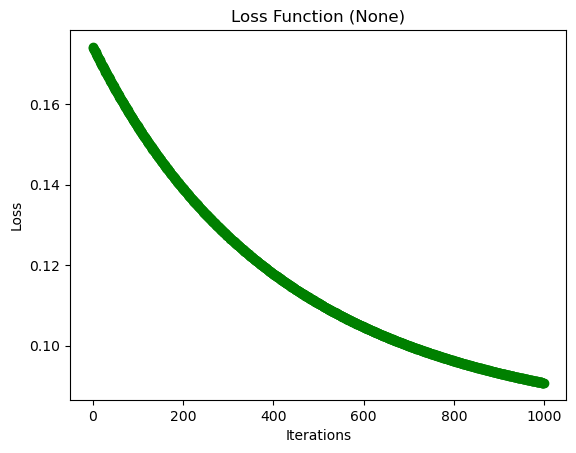

Linear Regression MSE: 0.1815, R²: 0.2012


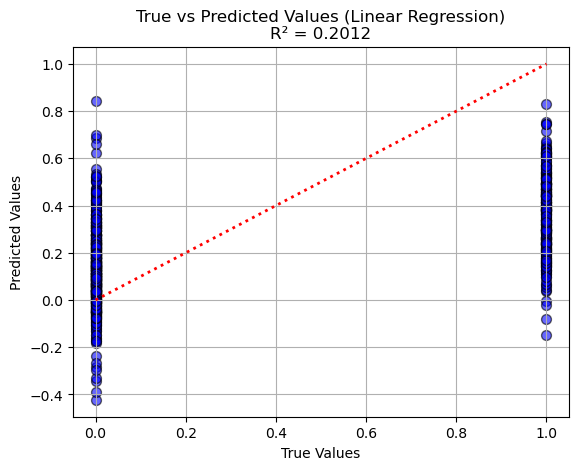

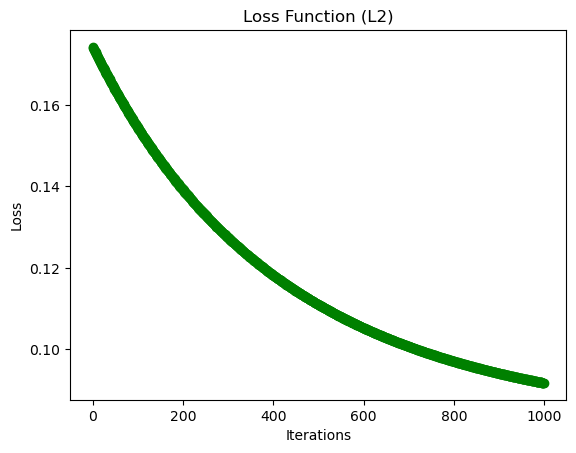

Ridge Regression MSE: 0.1821, R²: 0.1983


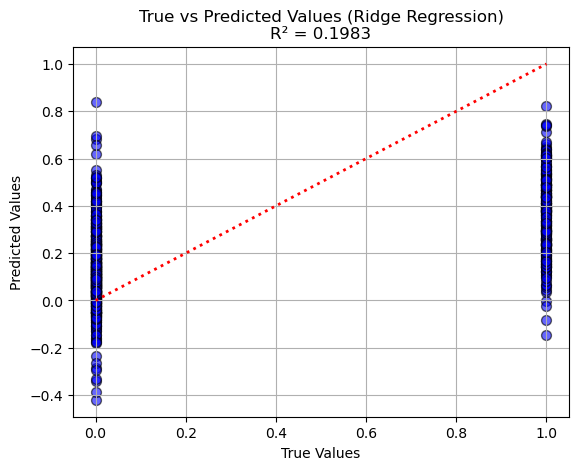

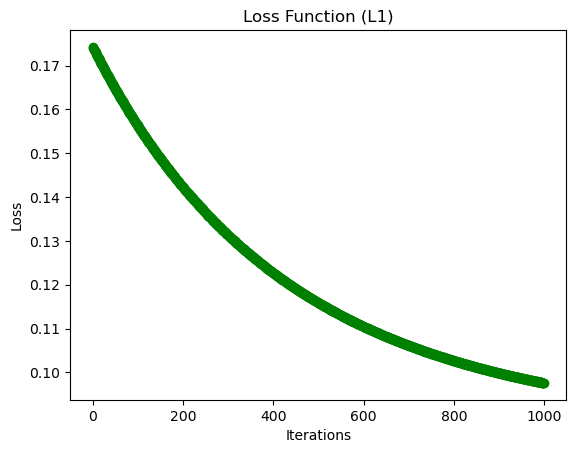

Lasso Regression MSE: 0.1846, R²: 0.1872


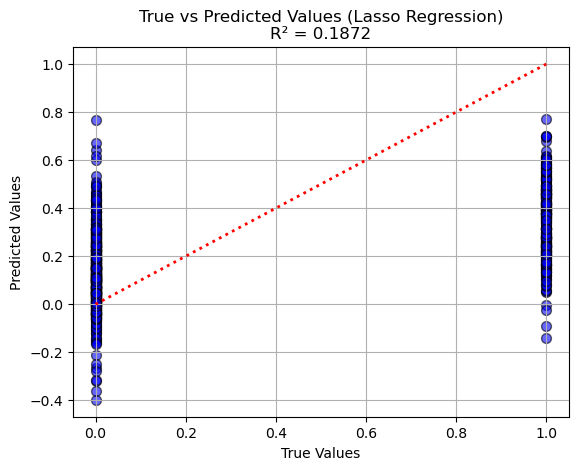

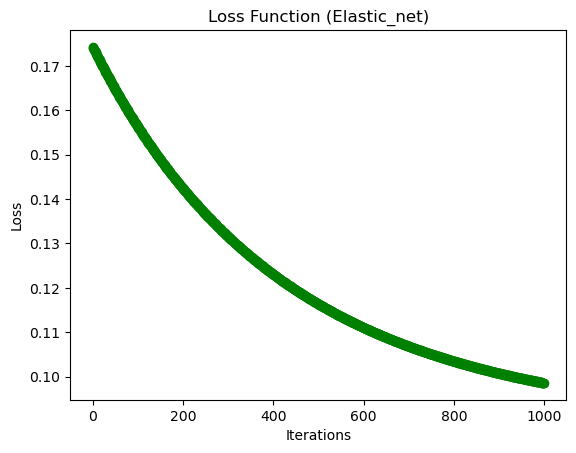

Elastic Net Regression MSE: 0.1853, R²: 0.1842


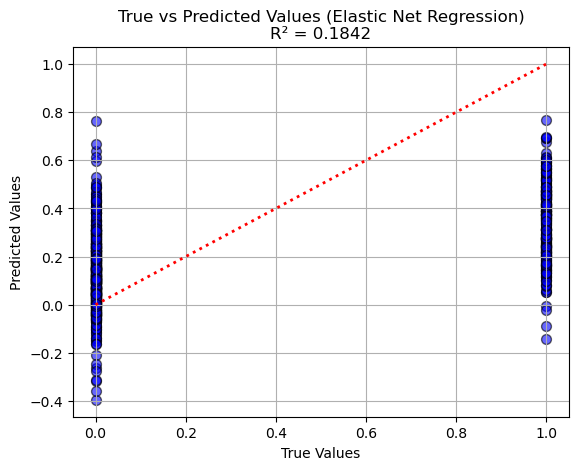

/var/folders/3t/077h8_4j36q3h05nq867xnm40000gn/T/ipykernel_9746/1976439489.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.plot(self.iteration_list, self.loss_list, 'ob', linestyle='solid', color='green')


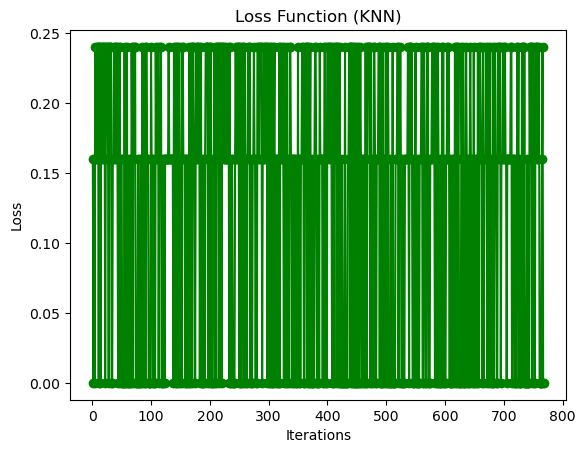

KNN Regression MSE: 0.1196, R²: 0.4736


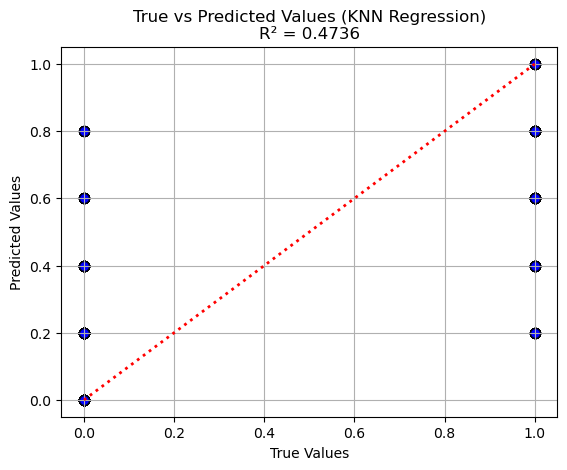


 
----------------------------WHITE WINE----------------------------

 


/var/folders/3t/077h8_4j36q3h05nq867xnm40000gn/T/ipykernel_9746/4133148496.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.plot(iteration_list, loss_list, 'ob', linestyle='solid', color='green')


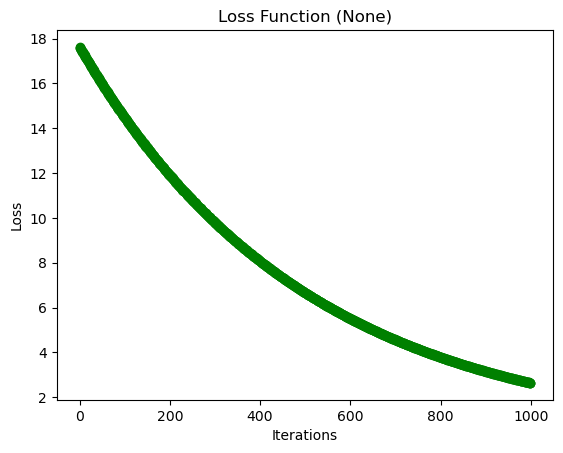

Linear Regression MSE: 5.2775, R²: -5.7298


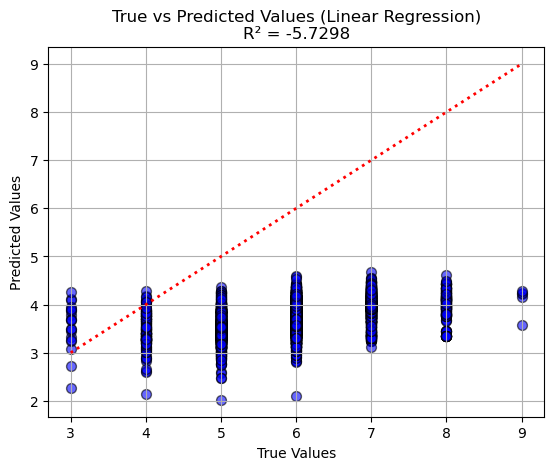

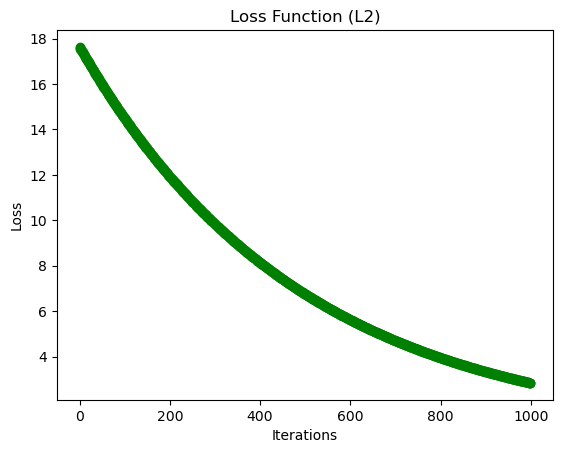

Ridge Regression MSE: 5.4125, R²: -5.9020


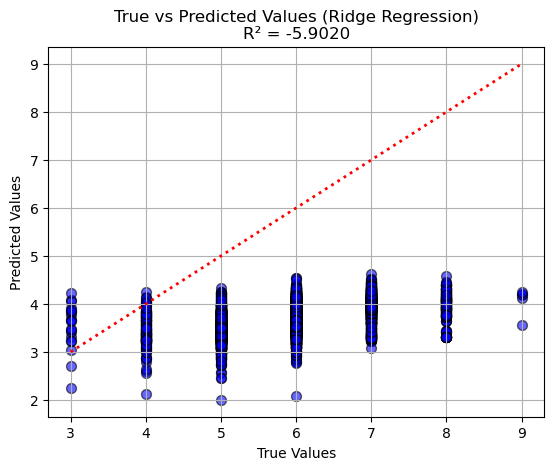

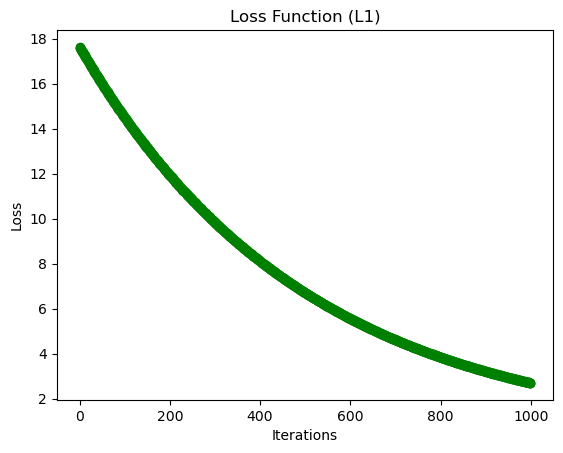

Lasso Regression MSE: 5.3090, R²: -5.7699


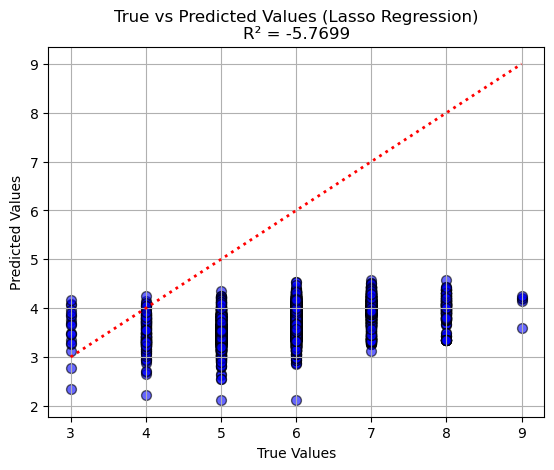

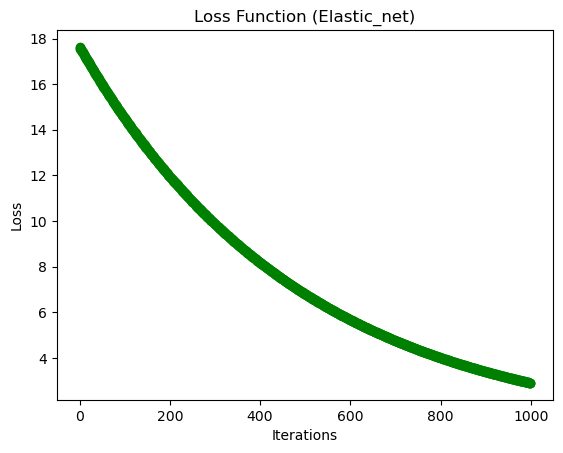

Elastic Net Regression MSE: 5.4442, R²: -5.9424


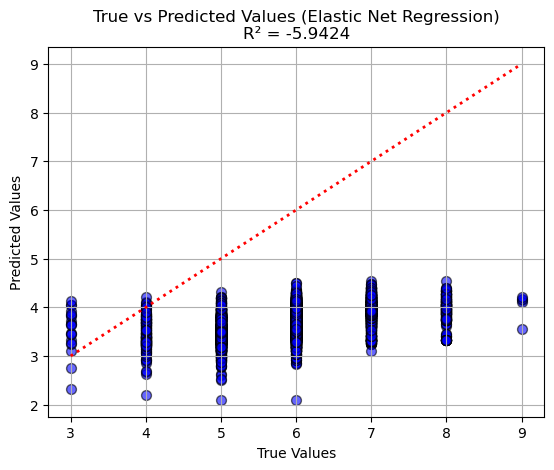

/var/folders/3t/077h8_4j36q3h05nq867xnm40000gn/T/ipykernel_9746/1976439489.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.plot(self.iteration_list, self.loss_list, 'ob', linestyle='solid', color='green')


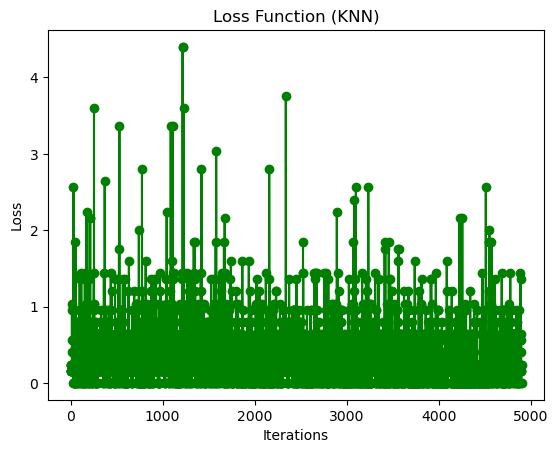

KNN Regression MSE: 0.3188, R²: 0.5934


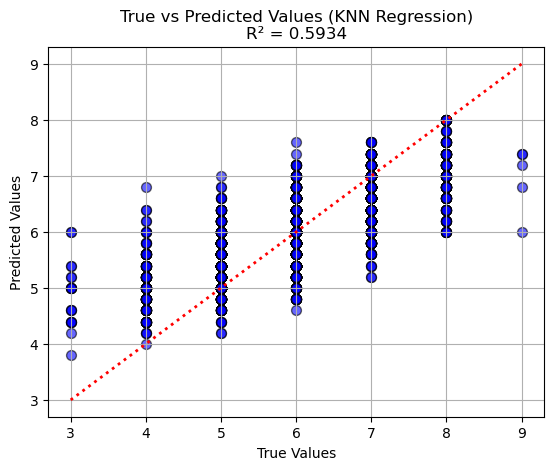


 
----------------------------GENERATED DATA----------------------------

 


/var/folders/3t/077h8_4j36q3h05nq867xnm40000gn/T/ipykernel_9746/4133148496.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.plot(iteration_list, loss_list, 'ob', linestyle='solid', color='green')


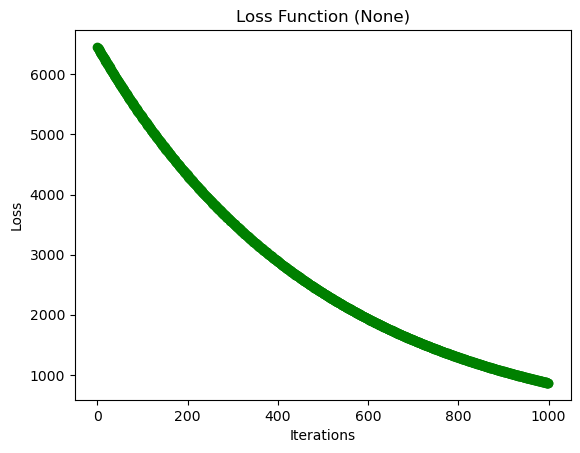

Linear Regression MSE: 1730.6350, R²: 0.8660


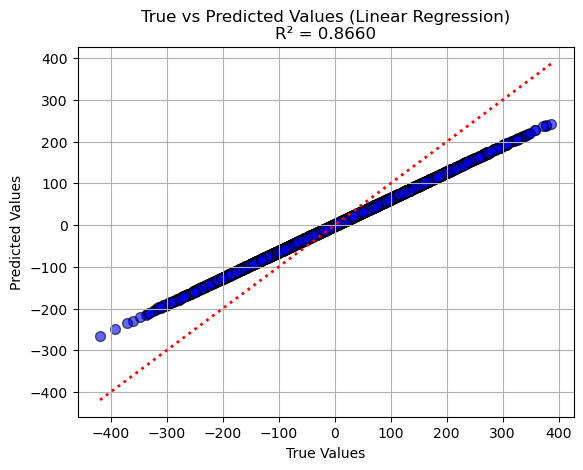

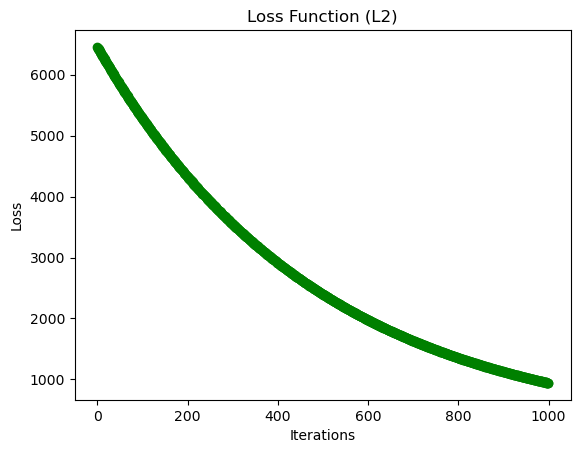

Ridge Regression MSE: 1780.7925, R²: 0.8621


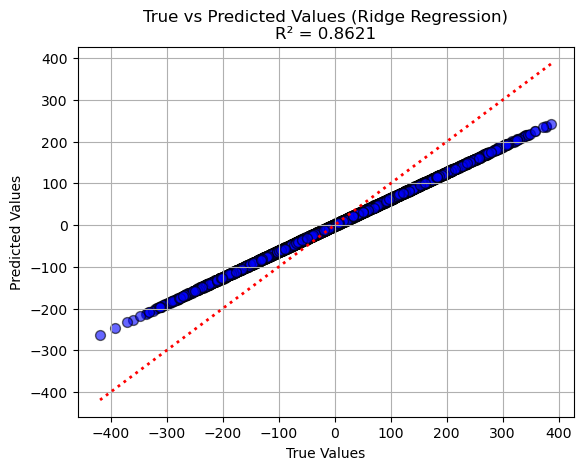

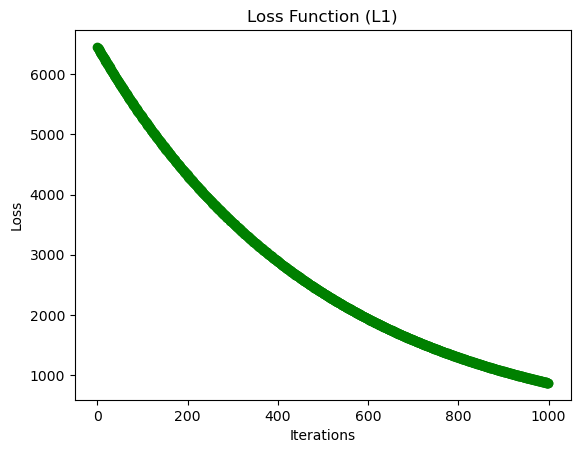

Lasso Regression MSE: 1732.1319, R²: 0.8659


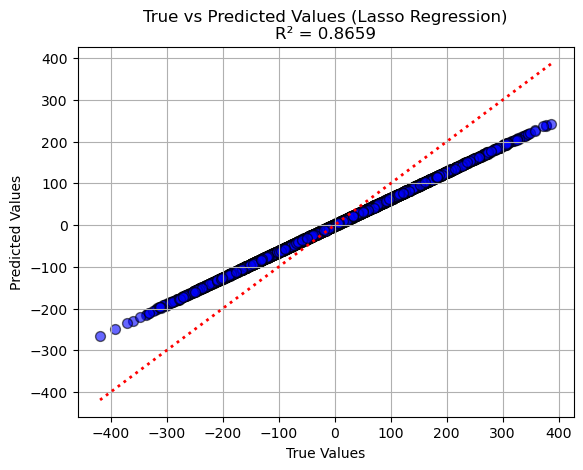

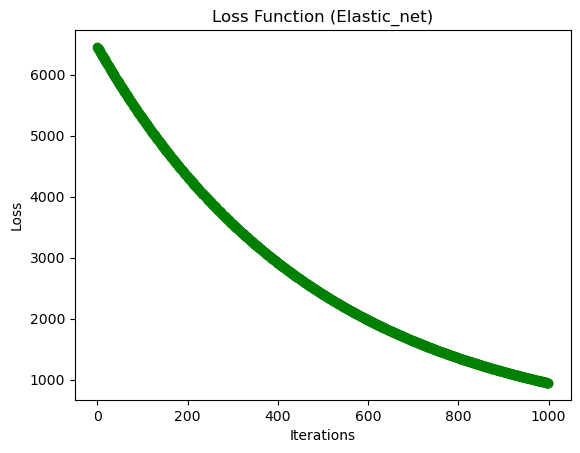

Elastic Net Regression MSE: 1782.2981, R²: 0.8620


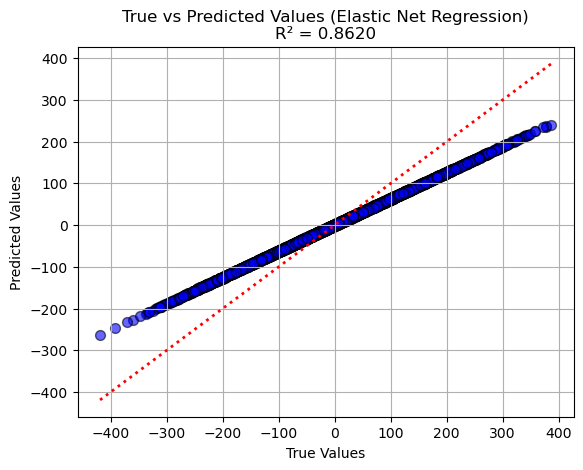

/var/folders/3t/077h8_4j36q3h05nq867xnm40000gn/T/ipykernel_9746/1976439489.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.plot(self.iteration_list, self.loss_list, 'ob', linestyle='solid', color='green')


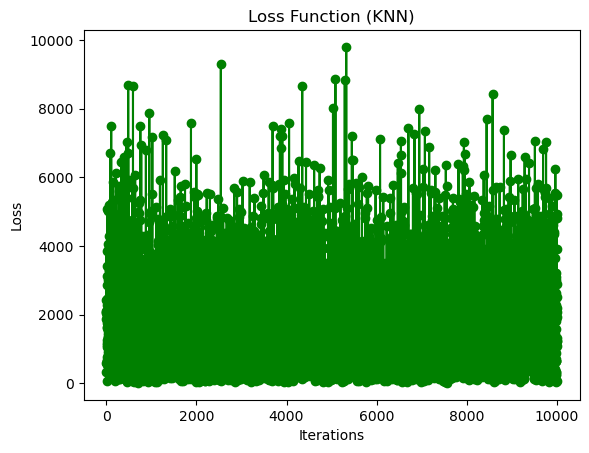

KNN Regression MSE: 682.2958, R²: 0.9472


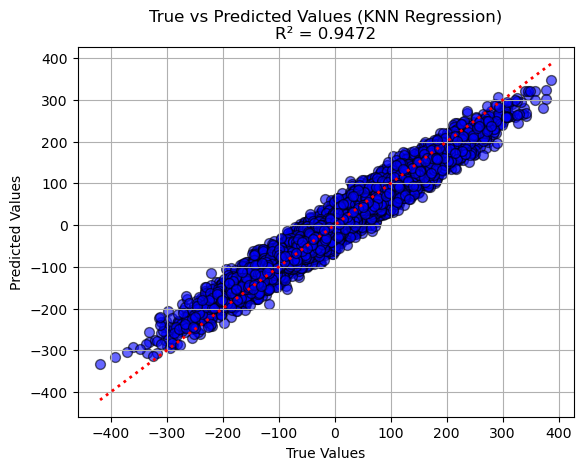



Results Table:
           Dataset                   Model          MSE        R²
0         Diabetes       Linear Regression     0.181477  0.201196
1         Diabetes        Ridge Regression     0.182132  0.198316
2         Diabetes        Lasso Regression     0.184650  0.187233
3         Diabetes  Elastic Net Regression     0.185338  0.184205
4         Diabetes          KNN Regression     0.119583  0.473633
5       White Wine       Linear Regression     5.277477 -5.729798
6       White Wine        Ridge Regression     5.412497 -5.901974
7       White Wine        Lasso Regression     5.308962 -5.769946
8       White Wine  Elastic Net Regression     5.444174 -5.942368
9       White Wine          KNN Regression     0.318840  0.593417
10  Generated Data       Linear Regression  1730.635047  0.866033
11  Generated Data        Ridge Regression  1780.792487  0.862150
12  Generated Data        Lasso Regression  1732.131910  0.865917
13  Generated Data  Elastic Net Regression  1782.298101  0.

/var/folders/3t/077h8_4j36q3h05nq867xnm40000gn/T/ipykernel_9746/4133148496.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.plot(iteration_list, loss_list, 'ob', linestyle='solid', color='green')


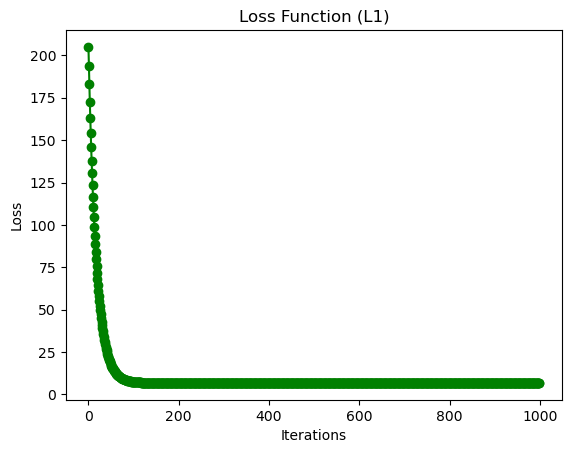

Predictions for Lasso: [ 13.62155469  16.2946038   12.77820103  11.83382717   3.38986016
   1.09577748 -14.28867634  -0.72143457  28.57992644  -7.33373033
   3.75888523 -37.14058135  14.2906282   29.27152247 -10.28536844
   3.14504343 -23.37470958  -5.34870084  31.75742899 -29.6437817
 -38.11981441  -1.79069502  26.50944076  14.68630736 -14.62118636
  10.65660184  11.34303522  10.7094925   -3.23330131 -43.15783977
   8.98964432  16.53181983 -21.85151725 -29.41345698  22.17899953
 -20.14911502   9.40706594  10.77322358  17.06470203  25.54289516
   5.30023531 -24.89974631 -26.0002895   11.89730357   5.99896588
  38.69814454   2.31596262  15.04161098  20.98307379  43.84131321]
Mean Squared Error for Lasso: 13.504498289390115
R² for Lasso: 0.9657


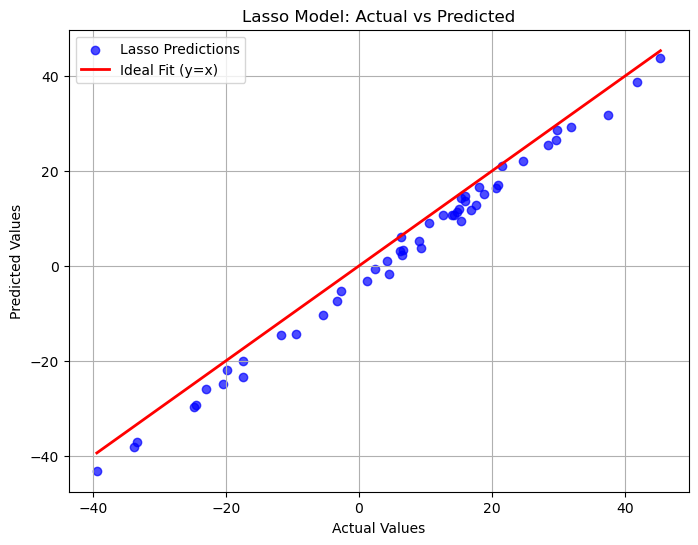


 
Testing Ridge

 


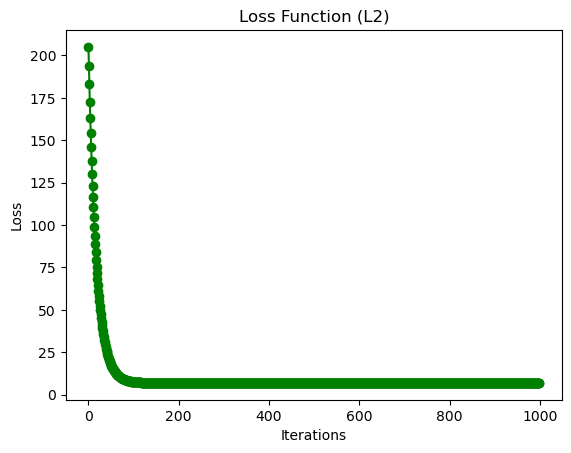

Predictions for Ridge: [ 13.61590279  16.28494505  12.77250625  11.825586     3.38684599
   1.09282206 -14.28312541  -0.72185321  28.56380873  -7.3296802
   3.75727525 -37.12087766  14.2843437   29.25420163 -10.2800271
   3.13975852 -23.3601236   -5.34355358  31.74034775 -29.62714533
 -38.09805897  -1.78664607  26.49559813  14.67614616 -14.61478122
  10.65254266  11.33423728  10.70408071  -3.22910045 -43.13441832
   8.98589421  16.52413437 -21.83826176 -29.39747543  22.16796082
 -20.13933538   9.40020162  10.7651975   17.05442078  25.52749031
   5.29818555 -24.88671656 -25.98650925  11.89179408   5.99481068
  38.67747466   2.31465754  15.03504853  20.9699548   43.81801304]
Mean Squared Error for Ridge: 13.504691644138942
R² for Ridge: 0.9657


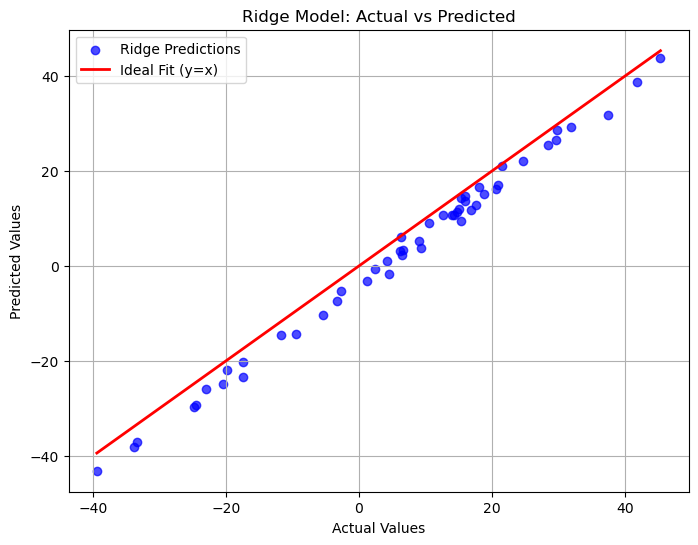


 
Testing KNN

 


/var/folders/3t/077h8_4j36q3h05nq867xnm40000gn/T/ipykernel_9746/1976439489.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.plot(self.iteration_list, self.loss_list, 'ob', linestyle='solid', color='green')


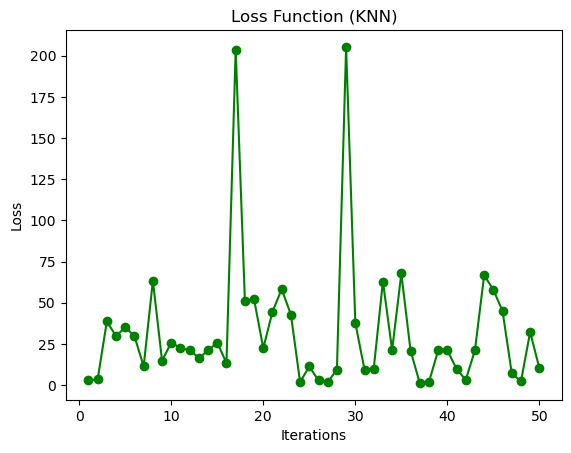

Predictions for KNN: [ 15.95815976  19.42541465  17.18629797   9.17496281  14.62441973
   9.17496281 -12.87916114   9.92135434  26.98247595  -0.80333768
  15.84735427 -26.96698737  14.34674429  27.11082384  -0.80333768
  11.1356498  -16.71743954   7.28795882  27.54014252 -27.19748046
 -25.35198469   8.11269204  20.68065947  14.40257715 -12.87916114
  15.95815976  14.40257715  14.30114375   0.41720889 -32.43365762
  14.30114375  14.8151565   -8.57556487 -26.96698737  26.55017027
 -17.41359071  14.21346064  14.40257715  27.11082384  27.11082384
   9.7720461  -22.75991316 -26.96698737  18.43040593   6.10451445
  38.9408089    5.92397981  16.64842205  22.39036771  41.53727589]
Mean Squared Error for KNN: 21.529983311743646
R² for KNN: 0.9454


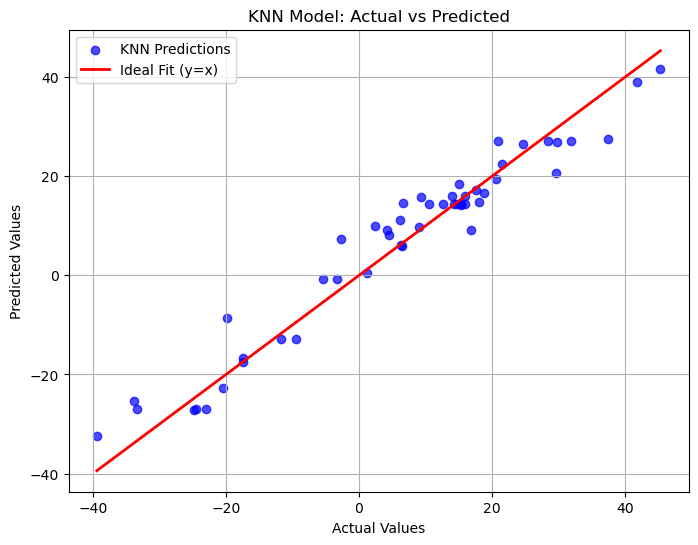


 
Testing ElasticNet

 


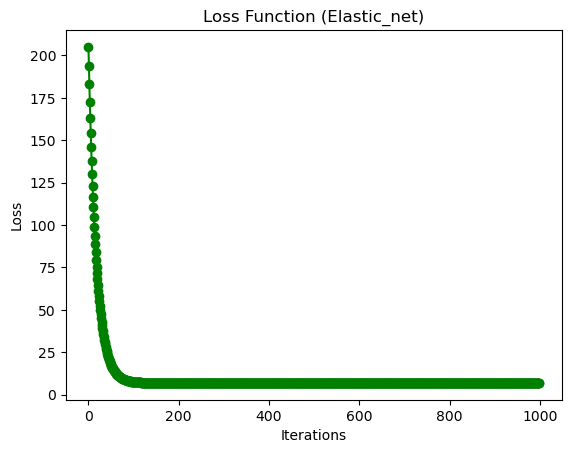

Predictions for ElasticNet: [ 13.61395719  16.2815548   12.76879172  11.8229257    3.3846831
   1.09199746 -14.27931261  -0.72147523  28.56181321  -7.32721009
   3.75538623 -37.11525799  14.28139865  29.24993063 -10.27674339
   3.14141683 -23.35832409  -5.34207916  31.7343072  -29.62320252
 -38.0934305   -1.78746399  26.49300849  14.67584141 -14.61167969
  10.65106189  11.33410517  10.70349717  -3.23065238 -43.1267149
   8.98558661  16.52231543 -21.83447051 -29.39269886  22.16314857
 -20.13588649   9.39976633  10.76504226  17.05194165  25.52410768
   5.2973809  -24.88416609 -25.98269474  11.89210051   5.99536085
  38.67187322   2.31448827  15.03228821  20.96917114  43.81114809]
Mean Squared Error for ElasticNet: 13.504786534596468
R² for ElasticNet: 0.9657


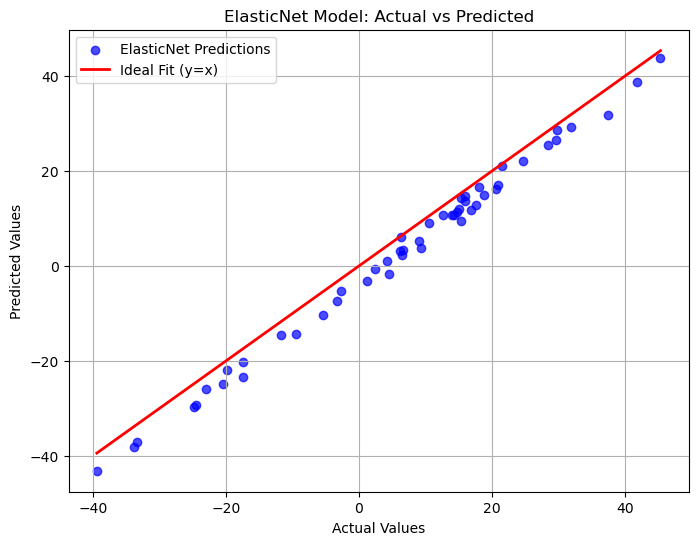

In [8]:
run_models()
test_predict()

In [9]:
import numpy as np
import pandas as pd

class ElasticNet:
    def __init__(self, alpha=1.0, l1_ratio=0.5, learning_rate=0.01, max_iter=1000):
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.coef_ = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.coef_ = np.zeros(num_features)

        for _ in range(self.max_iter):
            predictions = X.dot(self.coef_)
            errors = predictions - y
            gradient = (X.T.dot(errors) / num_samples) + self.alpha * (1 - self.l1_ratio) * self.coef_
            l1_penalty = self.alpha * self.l1_ratio * np.sign(self.coef_)
            self.coef_ -= self.learning_rate * (gradient + l1_penalty)

    def predict(self, X):
        return X.dot(self.coef_)

    def score(self, X, y):
        predictions = self.predict(X)
        mse = np.mean((predictions - y) ** 2)
        r2 = 1 - (np.sum((predictions - y) ** 2) / np.sum((y - np.mean(y)) ** 2))
        return mse, r2

def k_fold_cross_validation(model, X, y, n_splits=5):
    fold_size = len(y) // n_splits
    mse_scores = []
    r2_scores = []

    for i in range(n_splits):
        start = i * fold_size
        end = start + fold_size if i < n_splits - 1 else len(y)

        X_train = np.concatenate((X[:start], X[end:]), axis=0)
        y_train = np.concatenate((y[:start], y[end:]), axis=0)
        X_val = X[start:end]
        y_val = y[start:end]

        model.fit(X_train, y_train)
        mse, r2 = model.score(X_val, y_val)
        mse_scores.append(mse)
        r2_scores.append(r2)

        print(f"Fold {i + 1} - MSE: {mse}, R²: {r2}")

    avg_mse = np.mean(mse_scores)
    avg_r2 = np.mean(r2_scores)
    print(f"Average MSE over {n_splits} folds: {avg_mse}")
    print(f"Average R² over {n_splits} folds: {avg_r2}")

if __name__ == "__main__":
    print("----------------------------GENERATED DATA----------------------------")
    data = pd.read_csv('Data.csv')
    X = data.drop(columns='y').values  
    y = data['y'].values

    alpha = 0.001
    l1_ratio = 0.01
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

    # Perform K-Fold Cross-Validation
    k_fold_cross_validation(elastic_net, X, y, n_splits=5)




----------------------------GENERATED DATA----------------------------
Fold 1 - MSE: 12.569071852681008, R²: 0.9990183954891182
Fold 2 - MSE: 12.636289767434118, R²: 0.9990036622203452
Fold 3 - MSE: 12.406018075960594, R²: 0.9990534928957612
Fold 4 - MSE: 12.62360039258062, R²: 0.9990249782593933
Fold 5 - MSE: 12.416345013111266, R²: 0.9990464161127611
Average MSE over 5 folds: 12.530265020353522
Average R² over 5 folds: 0.9990293889954758
